Import Libraries

In [6]:
import keras
from keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization, Conv2D, MaxPooling2D
from keras import regularizers, optimizers
import numpy as np
import matplotlib.pyplot as plt

Import Data

In [8]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step


In [9]:
print('x_train shape:', x_train.shape)
print('x_valid shape:', x_valid.shape)
print('x_test shape:', x_test.shape)

x_train shape: (45000, 32, 32, 3)
x_valid shape: (5000, 32, 32, 3)
x_test shape: (10000, 32, 32, 3)


Pixel Normaliztion

In [10]:
mean = np.mean(x_train, axis = (0, 1 ,2, 3))
std = np.std(x_train, axis = (0, 1, 2, 3))
x_train = (x_train - mean) / (std + 1e-7)
x_valid = (x_valid - mean) / (std + 1e-7)
x_test = (x_test - mean) / (std + 1e-7)

One-Hot Encoding

In [11]:
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_valid = keras.utils.to_categorical(y_valid, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

Data Augumentation

In [15]:
datagen = ImageDataGenerator(
    rotation_range = 15,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    horizontal_flip = True,
    vertical_flip = False
)
datagen.fit(x_train)

Define Model(6CONV + 1FC)

In [17]:
base_hidden_units = 32
weight_decay = 1e-4
model = Sequential()

# CONV1
input_shape = x_train.shape[1:]
model.add(Conv2D(base_hidden_units, kernel_size=3, padding='same',
                 kernel_regularizer=regularizers.l2(weight_decay),
                 input_shape=input_shape))
model.add(Activation('relu'))
model.add(BatchNormalization())

# CONV2
model.add(Conv2D(base_hidden_units, kernel_size=3, padding='same',
                 kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

# POOL + Dropout
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# CONV3
model.add(Conv2D(base_hidden_units, kernel_size=3, padding='same',
                 kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

# CONV4
model.add(Conv2D(base_hidden_units, kernel_size=3, padding='same',
                 kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

# POOL + Dropout
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

# CONV5
model.add(Conv2D(base_hidden_units, kernel_size=3, padding='same',
                 kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

# POOL + Dropout
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

# CONV6
model.add(Conv2D(base_hidden_units, kernel_size=3, padding='same',
                 kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

# POOL + Dropout
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

# FC7
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 32)       │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 49,194 (192.16 KB)

 Trainable params: 48,810 (190.66 KB)

 Non-trainable params: 384 (1.50 KB)

In [20]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam

batch_size = 128
epochs = 125

checkpointer = ModelCheckpoint(
    filepath='model.100epochs.keras',
    verbose=1,
    save_best_only=True
)

optimizer = Adam(learning_rate=0.0001, decay=1e-6)

model.compile(
    loss='categorical_crossentropy',
    optimizer=optimizer,
    metrics=['accuracy']
)

history = model.fit(
    datagen.flow(x_train, y_train, batch_size=batch_size),
    callbacks=[checkpointer],
    steps_per_epoch=x_train.shape[0] // batch_size,
    epochs=epochs,
    verbose=2,
    validation_data=(x_valid, y_valid)
)


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/125

Epoch 1: val_loss improved from inf to 2.17066, saving model to model.100epochs.keras
351/351 - 173s - 493ms/step - accuracy: 0.1610 - loss: 3.1149 - val_accuracy: 0.1914 - val_loss: 2.1707
Epoch 2/125


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 2: val_loss improved from 2.17066 to 2.16754, saving model to model.100epochs.keras
351/351 - 4s - 11ms/step - accuracy: 0.2656 - loss: 2.5677 - val_accuracy: 0.1922 - val_loss: 2.1675
Epoch 3/125

Epoch 3: val_loss improved from 2.16754 to 1.75694, saving model to model.100epochs.keras
351/351 - 204s - 582ms/step - accuracy: 0.2380 - loss: 2.3839 - val_accuracy: 0.3454 - val_loss: 1.7569
Epoch 4/125

Epoch 4: val_loss did not improve from 1.75694
351/351 - 6s - 16ms/step - accuracy: 0.2891 - loss: 2.1744 - val_accuracy: 0.3450 - val_loss: 1.7576
Epoch 5/125

Epoch 5: val_loss improved from 1.75694 to 1.65482, saving model to model.100epochs.keras
351/351 - 252s - 719ms/step - accuracy: 0.2836 - loss: 2.1223 - val_accuracy: 0.4004 - val_loss: 1.6548
Epoch 6/125

Epoch 6: val_loss improved from 1.65482 to 1.65415, saving model to model.100epochs.keras
351/351 - 5s - 15ms/step - accuracy: 0.3281 - loss: 2.0924 - val_accuracy: 0.4006 - val_loss: 1.6541
Epoch 7/125

Epoch 7: val_los

In [21]:
scores = model.evaluate(x_test, y_test, batch_size = 128, verbose = 1)
print('\n Test result: %.3f loss: %.3f' % (scores[1]*100, scores[0]))

79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 83ms/step - accuracy: 0.6560 - loss: 0.9629

 Test result: 65.250 loss: 0.973


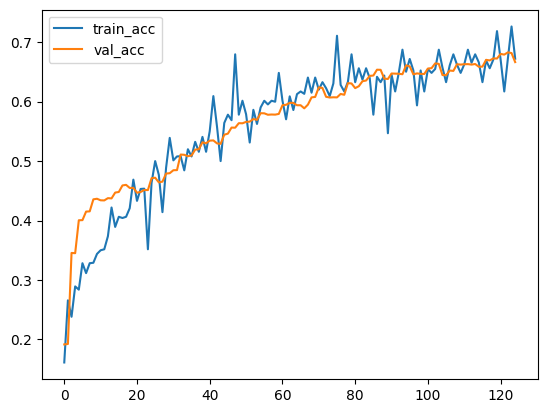

In [25]:
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()